<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!conda install folium
!pip install folium
!pip install geopy

Fetching package metadata ...........

PackageNotFoundError: Packages missing in current channels:
            
  - folium

We have searched for the packages in the following channels:
            
  - https://repo.continuum.io/pkgs/main/osx-64
  - https://repo.continuum.io/pkgs/main/noarch
  - https://repo.continuum.io/pkgs/free/osx-64
  - https://repo.continuum.io/pkgs/free/noarch
  - https://repo.continuum.io/pkgs/r/osx-64
  - https://repo.continuum.io/pkgs/r/noarch
  - https://repo.continuum.io/pkgs/pro/osx-64
  - https://repo.continuum.io/pkgs/pro/noarch
            

    100% |████████████████████████████████| 81kB 2.2MB/s ta 0:00:011
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /Users/ishashah/Library/Caches/pip/wheels/04/d0/a0/b2b8356443364ae79743fce0b9b6a5b045f7560742129fde22
Successfully built folium
    100% |████████████████████████████████| 71kB 769kB/s ta 0:00:01


In [3]:
!pip install gpxpy
import gpxpy.geo

  Running setup.py bdist_wheel for gpxpy ... done
  Stored in directory: /Users/ishashah/Library/Caches/pip/wheels/1b/b4/7c/c4775d65f2115b055c2cd6cbf4e4cac5bd4f5eb680d00db4f1
Successfully built gpxpy


In [4]:
df = pd.read_csv('datasets/metadata.csv')
df.head()

,Cell Cgi,Cell Tower Location,Comm Identifier,Comm Timedate String,Comm Type,Latitude,Longitude
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [5]:
df.shape

(10476, 7)

In [6]:
df.describe()

,Latitude,Longitude
count,10476.000000,10476.000000
mean,-35.136188,150.612841
std,3.141723,1.470169
min,-42.884810,144.848243
25%,-33.884603,151.202296
50%,-33.796610,151.266540
75%,-33.788150,151.266540
max,-33.557310,151.289340


In [12]:
df['Latitude'].unique()

array([-33.89293336, -33.88032891, -33.88417103, -33.88024   ,
       -33.86113   , -33.79661   , -33.796679  , -33.88964   ,
       -33.87829   , -33.8864    , -33.93416   , -42.83762   ,
       -42.84338   , -42.85984   , -42.85307   , -42.8606    ,
       -33.86655   , -33.87932   , -33.89605   , -33.89233   ,
       -33.87814   , -33.87055   , -33.8703    , -33.87215   ,
       -33.793648  , -33.80638   , -33.83096   , -33.924799  ,
       -42.88194   , -42.88101   , -33.884603  , -37.670418  ,
       -37.7778    , -37.7929    , -33.828073  , -33.79948   ,
       -33.879     , -33.779333  , -33.86633   , -33.78815   ,
       -33.87513   , -33.79345   , -33.79275   , -33.934674  ,
       -33.923217  , -33.937558  , -33.94674   , -33.93285   ,
       -33.90533   , -33.85947   , -33.8294    , -33.791965  ,
       -42.87457   , -42.88029   , -33.83415   , -33.88058   ,
       -42.82842   , -42.88481   , -33.75949   , -33.63599   ,
       -33.71763   , -33.57839   , -33.6038    , -33.55

In [7]:
df['Comm Timedate String'].unique()

array(['4/1/14 9:40', '4/1/14 9:42', '4/1/14 13:13', ..., '4/1/15 22:44',
       '4/1/15 22:45', '4/1/15 23:49'], dtype=object)

In [8]:
df['Comm Type'].unique()

array(['Phone', 'SMS', 'Internet'], dtype=object)

In [9]:
df.groupby('Cell Tower Location')['Comm Type'].value_counts()

Cell Tower Location                       Comm Type
71 MACQUARIE ST                           Internet       40
                                          Phone           8
                                          SMS             1
AIRPORT LINK                              Internet        4
                                          Phone           1
ASCOT VALE SOUTH                          Phone           1
BALGOWLAH HAYES ST                        Internet     3929
                                          SMS           206
                                          Phone         166
BALGOWLAH TE                              Internet       27
                                          Phone           2
                                          SMS             1
BALGOWLAH VILLAGE SHOPPING CENTRE IBC     Internet       96
                                          Phone           6
                                          SMS             4
BEECHWORTH                                Intern

In [10]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("71 MACQUARIE ST ")
print(location.address)

Macquarie Street, Liverpool, Sydney, Liverpool, NSW, 2170, Australia


In [15]:
import folium
map = folium.Map(location =(-33.892933,151.202296),zoom_start=12)

In [16]:
map

In [18]:
locations = df[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
print(len(locationlist))
locationlist[7]

10476


[-33.89293336, 151.20229619999998]

In [33]:
df['datetime'] = pd.to_datetime(df['Comm Timedate String'])

In [34]:
df.dtypes

Cell Cgi                        object
Cell Tower Location             object
Comm Identifier                 object
Comm Timedate String            object
Comm Type                       object
Latitude                       float64
Longitude                      float64
datetime                datetime64[ns]
dtype: object

In [32]:
import datetime
date_obj = datetime.datetime.strptime('31 Dec 2016', '%d %b %Y')
date_obj

datetime.datetime(2016, 12, 31, 0, 0)

In [50]:
df['date'] = [d.date() for d in df['datetime']]

In [51]:
df.dtypes

Cell Cgi                        object
Cell Tower Location             object
Comm Identifier                 object
Comm Timedate String            object
Comm Type                       object
Latitude                       float64
Longitude                      float64
datetime                datetime64[ns]
date                            object
year                             int64
dtype: object

In [39]:
df.isnull().sum()

Cell Cgi                   0
Cell Tower Location        0
Comm Identifier         9102
Comm Timedate String       0
Comm Type                  0
Latitude                   0
Longitude                  0
datetime                   0
date                       0
dtype: int64

In [37]:
df['date']

0        2014-04-01
1        2014-04-01
2        2014-04-01
3        2014-04-01
4        2014-04-01
5        2014-04-01
6        2014-04-01
7        2014-04-02
8        2014-04-03
9        2014-04-03
10       2014-04-04
11       2014-04-04
12       2014-04-04
13       2014-04-04
14       2014-04-04
15       2014-04-04
16       2014-04-04
17       2014-04-04
18       2014-04-04
19       2014-04-04
20       2014-04-04
21       2014-04-04
22       2014-04-05
23       2014-04-07
24       2014-04-07
25       2014-04-07
26       2014-04-07
27       2014-04-07
28       2014-04-07
29       2014-04-07
            ...    
10446    2015-04-01
10447    2015-04-01
10448    2015-04-01
10449    2015-04-01
10450    2015-04-01
10451    2015-04-01
10452    2015-04-01
10453    2015-04-01
10454    2015-04-01
10455    2015-04-01
10456    2015-04-01
10457    2015-04-01
10458    2015-04-01
10459    2015-04-01
10460    2015-04-01
10461    2015-04-01
10462    2015-04-01
10463    2015-04-01
10464    2015-04-01


In [38]:
df.groupby('date')['Cell Tower Location'].value_counts()

date        Cell Tower Location                  
2014-04-01  HAYMARKET #                               3
            CHIPPENDALE                               2
            REDFERN TE                                2
2014-04-02  REDFERN TE                                1
2014-04-03  HAYMARKET #                               2
2014-04-04  HAYMARKET #                               3
            REDFERN TE                                3
            CHIPPENDALE                               2
            FAIRLIGHT 137 SYDNEY RD                   2
            71 MACQUARIE ST                           1
            HAYMARKET TE LEVEL 5 SRA BTS HOTEL        1
2014-04-05  MANLY #                                   1
2014-04-07  REDFERN TE                               10
2014-04-08  REDFERN TE                                8
2014-04-10  CHIPPENDALE                               7
            REDFERN TE                                1
2014-04-11  SURRY HILLS                               

In [90]:
group_data_loc = df.groupby(['year',df['datetime'].dt.strftime('%B'),'Comm Type'])['Cell Tower Location'].value_counts()

In [91]:
group_data_loc

year  datetime  Comm Type  Cell Tower Location                     
2014  April     Phone      REDFERN TE                                  34
                           HAYMARKET #                                 11
                           CHIPPENDALE                                  7
                           FAIRLIGHT 137 SYDNEY RD                      3
                           71 MACQUARIE ST                              1
                           CHINATOWN                                    1
                           HAYMARKET TE LEVEL 5 SRA BTS HOTEL           1
                           MANLY #                                      1
                           SURRY HILLS                                  1
                SMS        REDFERN TE                                  45
                           HAYMARKET #                                 41
                           CHIPPENDALE                                 11
                           MANLY #          

In [78]:
group_data = df.groupby(['year',df['datetime'].dt.strftime('%B')])['Comm Type'].value_counts()

In [48]:
df['year'] = df['datetime'].dt.year

In [79]:
group_data

year  datetime   Comm Type
2014  April      SMS            98
                 Phone          60
      August     Phone          60
                 SMS            40
      December   Internet     2603
                 Phone          70
                 SMS            49
      July       Phone          66
                 SMS            54
      June       SMS            55
                 Phone          29
      May        SMS            73
                 Phone          47
      November   Internet     1772
                 Phone          63
                 SMS            58
      October    Internet      825
                 Phone          42
                 SMS            15
      September  Internet      257
                 Phone          53
                 SMS            50
2015  April      Internet       87
                 Phone           8
      February   Internet      474
                 Phone          22
                 SMS             3
      January    Internet   

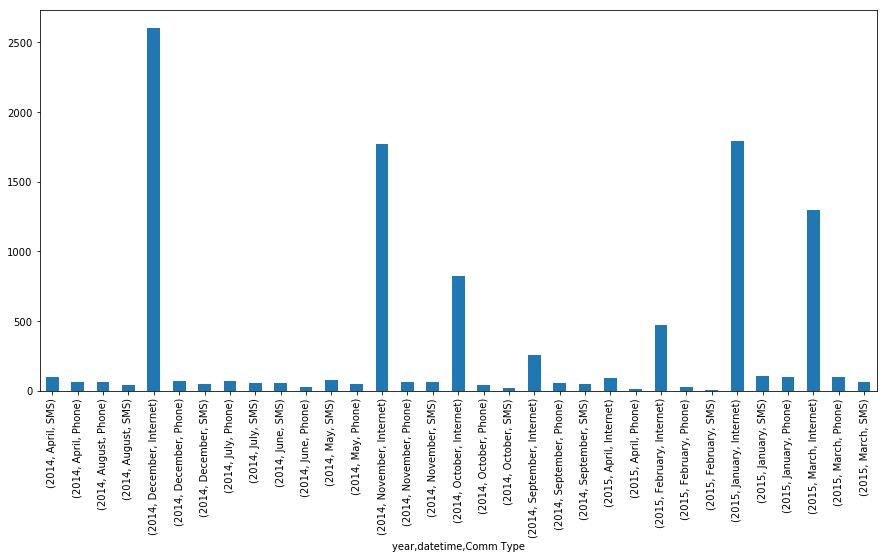

In [93]:

fig = group_data.plot(kind='bar',figsize=(15,7))
fig


In [81]:
df['Comm Type'].value_counts()

Internet    9102
Phone        717
SMS          657
Name: Comm Type, dtype: int64

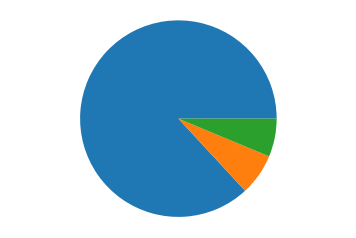

In [89]:
labels = 'Internet','Phone' 'SMS'
X = [9102,717,657]
plt.pie(df['Comm Type'].value_counts())
plt.axis('equal')
plt.show()

- Percentage usage of Internet is more than SMS and Phone
- Internet usgae is significantly high in following months
    - 2014 December
    - 2014 November
    - 2014 OCtober
    - 2014 Septmeber
    - 2015 Jan
    - 2015 March
    - 2015 Feb
    